In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

data = np.genfromtxt('/content/drive/MyDrive/Res_Plus.txt')
data = np.delete(data,0,0)

In [6]:
means = []
errors_on_means = []
thetas = [] 
errors_on_thetas = [] 
og_thetas = [] #original values, not the ones extrapolated from the gaussian fit 

In [7]:
for x in [[5,6],[6,7],[11,13],[13,15],[18,20],[20,22],[25,27],[27,30]]: #These specify the ranges in which you find the individual peaks 
  
  if x[1] < 21: #Anything to the left of this was one dataset, while after was another, so this specifies which to use 
    y = data[:,1]
  else:
    y = data[:,2]

  peak = np.where(np.logical_and(data[:,0]>=x[0], data[:,0]<=x[1]))[0] #This takes only the indexes of the values in the selected range 
  to_fit = y[peak] #This takes the counts at those indexes
  to_fit_xvals = data[:,0][peak] #This takes the wavelengths at those indexes 

  midpoint = np.max(to_fit) #This finds the highest point, the max of the peak 
  mid_index = np.where(to_fit == midpoint)[0][0] #This is the index where it is found

  indeces = [mid_index-1,mid_index,mid_index+1,mid_index+2] #This takes one point to the left and two to the right, either using only one on each side or two on both sides was problematic
  #So this is what worked with the code 

  def gaussian(x, a, b, c): #This will be used to fit to the points we just selected around the peak
      return a*np.exp(-np.power(x - b, 2)/(2*np.power(c, 2)))

  pars, cov = curve_fit(f=gaussian, xdata=to_fit_xvals[indeces], ydata=to_fit[indeces], bounds=(0, max(to_fit))) #Fitting the curve, getting parameters and their errors 

  x = np.linspace(to_fit_xvals[indeces].min(), to_fit_xvals[indeces].max())

  errors = np.sqrt(np.diag(cov)) #errors of parameters 

  mean = pars[0] #The mean or the center of the gaussian is provided by the first parameter
  error_on_mean = errors[0] 
  theta = pars[1] #The second parameter defines theta, or the x value corresponding to the peak value estimated by the gaussian
  error_on_theta = errors[1]

  means.append(mean)
  errors_on_means.append(error_on_mean)
  thetas.append(theta)
  errors_on_thetas.append(error_on_theta)
  og_thetas.append(to_fit_xvals[mid_index])

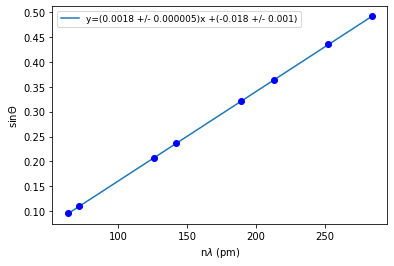

In [8]:
thetas2 = np.array([og_thetas])[0]
errors_on_thetas2 = np.array([errors_on_thetas])[0]
wavelengths = np.array([63.09,71.08,63.09,71.08,63.09,71.08,63.09,71.08]) #wavelengths for Kalpha and Kbeta lines of the xrays 
thetas3 = thetas2/wavelengths
plt.xlabel('n$\lambda$ (pm)')
plt.ylabel('sin$\Theta$')
plt.errorbar([1,1,2,2,3,3,4,4]*wavelengths,np.sin(thetas2*np.pi/180),yerr=np.sin(errors_on_thetas2*np.pi/180),fmt='bo') 

def bestfit(x, m, b):
  return m*x + b

pars, cov = curve_fit(f=bestfit, xdata=[1,1,2,2,3,3,4,4]*wavelengths, ydata=np.sin(thetas2*np.pi/180), sigma=np.sin(errors_on_thetas2*np.pi/180)) #Fitting best fit line 
errors = np.sqrt(np.diag(cov))

plt.plot([1,1,2,2,3,3,4,4]*wavelengths,bestfit([1,1,2,2,3,3,4,4]*wavelengths,*pars),label='y=({:.4f} +/- {:.6f})x +({:.3f} +/- {:.3f})'.format(pars[0],errors[0],pars[1],errors[1]))

plt.legend(fontsize=9)